**Importing necassary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-5xgbkqnh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-5xgbkqnh
  Resolved https://github.com/facebookresearch/detectron2.git to commit bcfd464d0c810f0442d91a349c0f6df945467143
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [ ]:
import os
import zipfile

# Define the paths
zip_path = '/content/drive/MyDrive/document classifcation.zip'
extract_path = '/content/drive/MyDrive/document classification'

# Create the new folder
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Delete the zip file
os.remove(zip_path)

print("Unzipping complete and zip file deleted.")


Unzipping complete and zip file deleted.


In [ ]:


from datasets import (Array2D, Array3D, ClassLabel, Dataset, Features,
                      Sequence, Value)
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from transformers import (AdamW, LayoutLMv2FeatureExtractor,
                          LayoutLMv2ForSequenceClassification,
                          LayoutLMv2Processor, LayoutLMv2Tokenizer)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 req

**Global Variables**

In [ ]:
dataset_path = r"/content/drive/MyDrive/document classification/tobacco3482-jpg/Tobacco3482-jpg"
input_size = 224
ch = 3
test_size = 0.2

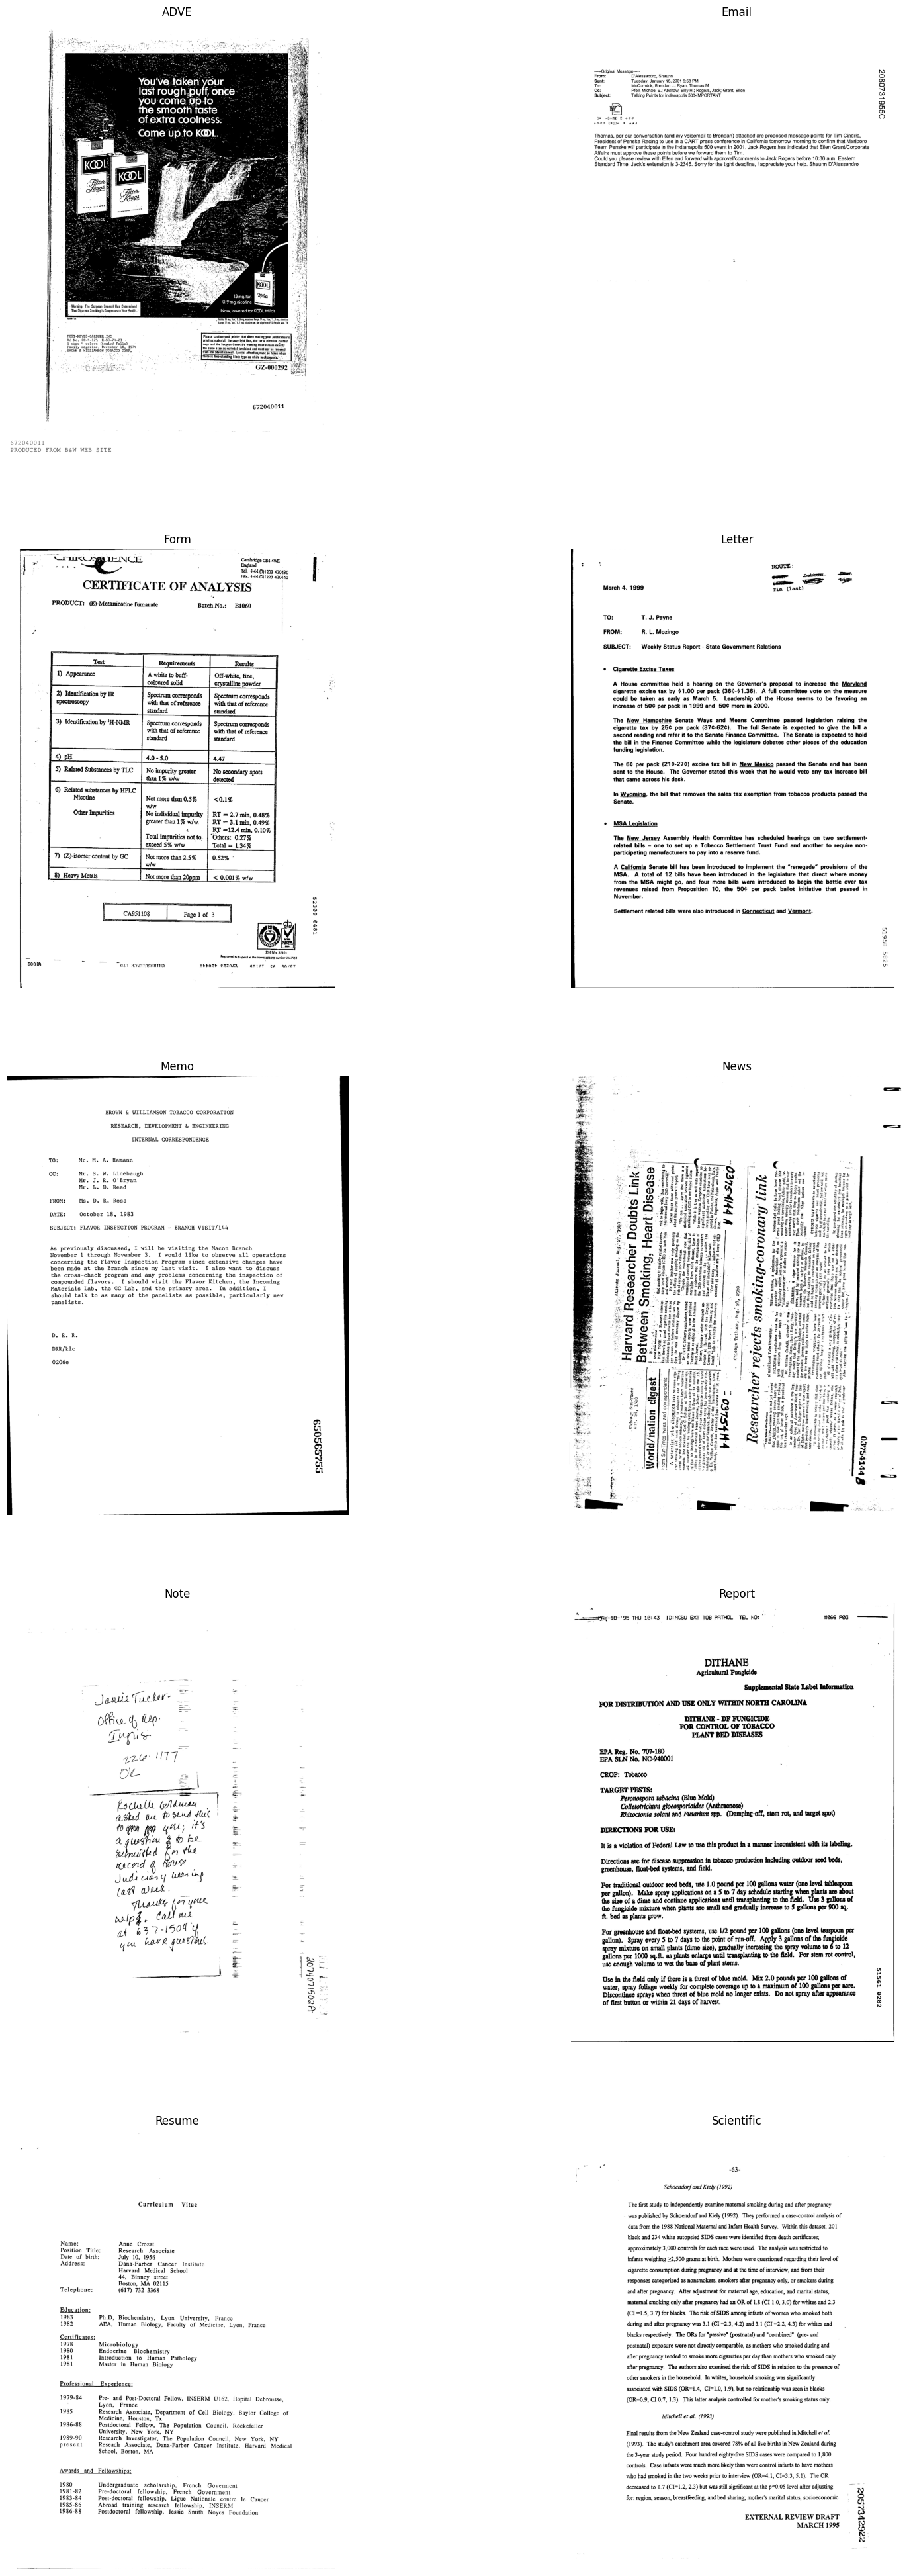

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
def plot_images(path):
    plt.figure(figsize=(20,50))
    for idx, label in enumerate(os.listdir(path)):
        label_path = os.path.join(path, label)
        images = os.listdir(label_path)

        plt.subplot(5,2,idx+1)
        k = np.random.randint(0, len(images))
        im = Image.open(os.path.join(label_path, images[k]))
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.title(label)

    plt.show()

plot_images(dataset_path)

**Data Visualization**

In [ ]:
def count_exp(path):
    c = {}
    for expression in os.listdir(path):
        class_path = os.path.join(path, expression)
        c[expression] = len(os.listdir(class_path))
    df = pd.DataFrame(c, index=["count"])
    return df

In [ ]:
import pandas as pd
count = count_exp(dataset_path)
print(count)

       ADVE  Email  Form  Letter  Memo  News  Note  Report  Resume  Scientific
count   231    600   432     568   621   189   202     266     121         262


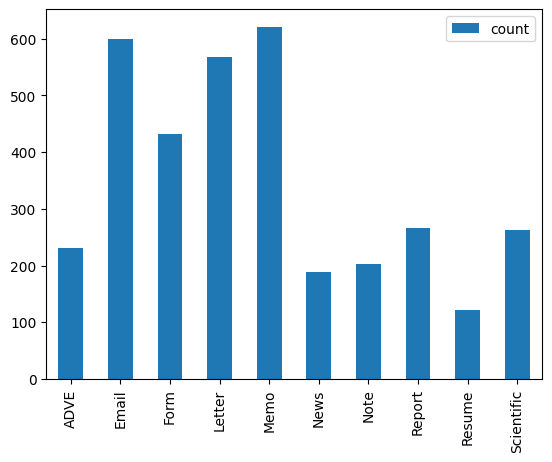

In [ ]:
count.transpose().plot(kind='bar');


**Data Preprocessing**

In [ ]:
import os
labels = [label for label in os.listdir(dataset_path)]
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
print(label2id)

{'ADVE': 0, 'Email': 1, 'Form': 2, 'Letter': 3, 'Memo': 4, 'News': 5, 'Note': 6, 'Report': 7, 'Resume': 8, 'Scientific': 9}


In [ ]:
# loading data
images = []
labels = []

for label_folder, _, file_names in os.walk(dataset_path):
    if label_folder != dataset_path:
        label = label_folder.split("/")[-1]
        for _, _, image_names in os.walk(label_folder):
            relative_image_names = []
            for image_file in image_names:
                relative_image_names.append(
                    dataset_path + "/" + label + "/" + image_file)
            images.extend(relative_image_names)
            labels.extend([label] * len(relative_image_names))

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})

labels = list(set(labels))
data.head()

,image_path,label
0,/content/drive/MyDrive/document classification...,ADVE
1,/content/drive/MyDrive/document classification...,ADVE
2,/content/drive/MyDrive/document classification...,ADVE
3,/content/drive/MyDrive/document classification...,ADVE
4,/content/drive/MyDrive/document classification...,ADVE


In [ ]:
data.shape


(3492, 2)

In [ ]:
# #each folder has corrupt files, they are to be remove from the dataset

# print("\n[INFO] Checking Dataset..")
# c = 0
# for index, row in data.iterrows():
#     im_path, label = row
#     try:
#         im = Image.open(im_path).convert("RGB")
#     except Exception as e:
#         print(e)
#         c += 1
#         data.drop(index, inplace=True)

# print(f"done found {c} corrupt images\n")




from PIL import Image
import pandas as pd

def is_image_file(filepath):
    try:
        Image.open(filepath).convert("RGB")
        return True
    except Exception:
        return False

print("\n[INFO] Checking Dataset..")
c = 0
for index, row in data.iterrows():
    im_path, label = row
    if not is_image_file(im_path):
        print(f"Removing corrupt file: {im_path}")
        c += 1
        data.drop(index, inplace=True)

print(f"Done. Found and removed {c} corrupt images\n")


In [ ]:
train_df, test_df = train_test_split(data, test_size=test_size)

print(f"Train Len:: {len(train_df)}\tTest Len:: {len(test_df)}")

Train Len:: 2793	Test Len:: 699


In [ ]:
train_df.label.value_counts()


,count
label,
Memo,507
Email,482
Letter,451
Form,342
Report,213
Scientific,201
ADVE,192
Note,158
News,151


In [ ]:
test_df.label.value_counts()


,count
label,
Email,118
Letter,117
Memo,114
Form,90
Scientific,61
Report,53
Note,44
ADVE,39
News,38


In [ ]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
feature_extractor = LayoutLMv2FeatureExtractor()
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)


# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(ch, input_size, input_size)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(labels), names=labels),
})

/usr/local/lib/python3.10/dist-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [ ]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [ ]:
import torch

# Define device based on whether CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def preprocess_data(examples):
    # take a batch of images
    images = [Image.open(path).convert("RGB")
              for path in examples['image_path']]
    encoded_inputs = processor(images, padding="max_length", truncation=True)

    # add labels
    encoded_inputs["labels"] = [label2id[label] for label in examples["label"]]

    return encoded_inputs


print("\nEncoding Dataset")
train_encoded_data = train_dataset.map(preprocess_data, remove_columns=train_dataset.column_names,
                                       features=features, batched=True, batch_size=2)

train_encoded_data.set_format(type="torch", device=device)


test_encoded_data = test_dataset.map(preprocess_data, remove_columns=test_dataset.column_names,
                                     features=features, batched=True, batch_size=2)

test_encoded_data.set_format(type="torch", device=device)


Encoding Dataset


Map:   0%|          | 0/2785 [00:00<?, ? examples/s]

Map:   0%|          | 0/697 [00:00<?, ? examples/s]

In [ ]:
# import torch

# # Define device based on whether CUDA (GPU) is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("\nEncoding Dataset")
# train_encoded_data = train_dataset.map(preprocess_data, remove_columns=train_dataset.column_names,
#                                        features=features, batched=True, batch_size=2)

# train_encoded_data.set_format(type="torch", device=device)


# test_encoded_data = test_dataset.map(preprocess_data, remove_columns=test_dataset.column_names,
#                                      features=features, batched=True, batch_size=2)

# test_encoded_data.set_format(type="torch", device=device)

In [ ]:
import torch

# Path to save the encoded data
train_encoded_data_path = '/content/drive/MyDrive/train_encoded_data.pt'
test_encoded_data_path = '/content/drive/MyDrive/test_encoded_data.pt'

# Save the encoded datasets
torch.save(train_encoded_data, train_encoded_data_path)
torch.save(test_encoded_data, test_encoded_data_path)

print("Encoded datasets saved to Google Drive.")


Encoded datasets saved to Google Drive.


In [ ]:
import torch

# Path to load the encoded data
train_encoded_data_path = '/content/drive/MyDrive/train_encoded_data.pt'
test_encoded_data_path = '/content/drive/MyDrive/test_encoded_data.pt'

# Load the encoded datasets
train_encoded_data = torch.load(train_encoded_data_path)
test_encoded_data = torch.load(test_encoded_data_path)

print("Encoded datasets loaded from Google Drive.")


Encoded datasets loaded from Google Drive.


In [ ]:
# data loaders
train_dataloader = torch.utils.data.DataLoader(train_encoded_data, batch_size=8, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_encoded_data, batch_size=8)

In [ ]:
import torch

# Define device based on whether CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased",
                                                            num_labels=len(labels))
model.to(device)

pytorch_model.bin:   0%|          | 0.00/802M [00:00<?, ?B/s]

Some weights of LayoutLMv2ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMv2ForSequenceClassification(
  (layoutlmv2): LayoutLMv2Model(
    (embeddings): LayoutLMv2Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (visual): LayoutLMv2VisualBackbone(
      (backbone): FPN(
        (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [ ]:
def train(model, dataloader, optimizer):
    model.train()
    pbar = tqdm(dataloader)
    correct = 0
    total_loss = 0
    progress = 0
    for batch_idx, batch in enumerate(pbar):

        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        predictions = outputs.logits.argmax(-1)
        correct += (predictions == batch['labels']).float().sum()
        total_loss += loss.item()
        progress += batch["input_ids"].shape[0]

        pbar.set_description(
            desc=f'batch_id={batch_idx} loss={total_loss / (batch_idx+1):.4f} acc={100 * correct / progress:.2f} %')


def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    correct = 0
    iteration = 0
    with torch.no_grad():
        for batch in dataloader:
            # forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_loss += loss.item()
            predictions = outputs.logits.argmax(-1)
            correct += (predictions == batch['labels']).float().sum()
            iteration += 1

    accuracy = 100 * correct / len(dataloader.dataset)
    print("loss: {:.4f} \t Accuracy: {:.2f} %\n".format(
        total_loss / iteration, accuracy.item()))


In [ ]:
input_size = 224
ch = 3
test_size = 0.2
epochs = 15
lr=5e-5

In [ ]:
optimizer = AdamW(model.parameters(), lr=lr)
for epoch in range(epochs):
    print("Epoch: ",epoch)

    train(model, train_dataloader, optimizer)
    evaluate(model, test_dataloader)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:  0


batch_id=348 loss=0.8602 acc=75.26 %: 100%|██████████| 349/349 [04:02<00:00,  1.44it/s]


loss: 0.3886 	 Accuracy: 89.38 %

Epoch:  1


batch_id=348 loss=0.3635 acc=89.98 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.3262 	 Accuracy: 92.11 %

Epoch:  2


batch_id=348 loss=0.3051 acc=91.13 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.2677 	 Accuracy: 91.97 %

Epoch:  3


batch_id=348 loss=0.2360 acc=93.64 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.2497 	 Accuracy: 92.68 %

Epoch:  4


batch_id=348 loss=0.2188 acc=93.61 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.2351 	 Accuracy: 93.11 %

Epoch:  5


batch_id=348 loss=0.1681 acc=94.97 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.2308 	 Accuracy: 94.12 %

Epoch:  6


batch_id=348 loss=0.1201 acc=96.48 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.2575 	 Accuracy: 93.69 %

Epoch:  7


batch_id=348 loss=0.1293 acc=96.62 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.2587 	 Accuracy: 92.40 %

Epoch:  8


batch_id=348 loss=0.2144 acc=94.04 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.3897 	 Accuracy: 88.95 %

Epoch:  9


batch_id=348 loss=0.2344 acc=93.57 %: 100%|██████████| 349/349 [04:00<00:00,  1.45it/s]


loss: 0.2992 	 Accuracy: 91.68 %

Epoch:  10


batch_id=348 loss=0.2032 acc=94.25 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.3818 	 Accuracy: 90.53 %

Epoch:  11


batch_id=348 loss=0.1401 acc=96.34 %: 100%|██████████| 349/349 [04:00<00:00,  1.45it/s]


loss: 0.3377 	 Accuracy: 91.25 %

Epoch:  12


batch_id=348 loss=0.1098 acc=97.20 %: 100%|██████████| 349/349 [04:00<00:00,  1.45it/s]


loss: 0.3580 	 Accuracy: 90.82 %

Epoch:  13


batch_id=348 loss=0.0770 acc=98.28 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.3950 	 Accuracy: 90.82 %

Epoch:  14


batch_id=348 loss=0.1432 acc=96.48 %: 100%|██████████| 349/349 [04:01<00:00,  1.45it/s]


loss: 0.3690 	 Accuracy: 91.54 %



In [ ]:

# Save the model to Google Drive
model_save_path = '/content/drive/MyDrive/document_classification_model_v2.bin'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/document_classification_model_v2.bin


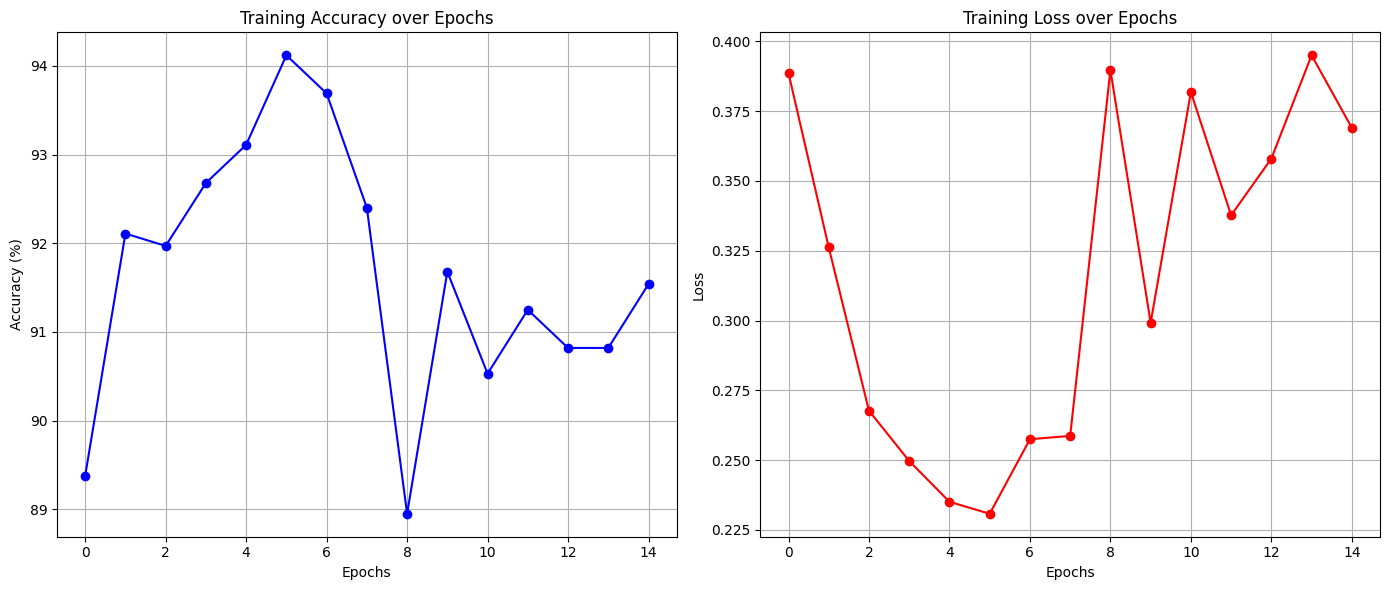

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(15))
train_acc = [89.38, 92.11, 91.97, 92.68, 93.11, 94.12, 93.69, 92.40, 88.95, 91.68, 90.53, 91.25, 90.82, 90.82, 91.54]
train_loss = [0.3886, 0.3262, 0.2677, 0.2497, 0.2351, 0.2308, 0.2575, 0.2587, 0.3897, 0.2992, 0.3818, 0.3377, 0.3580, 0.3950, 0.3690]

# Plotting Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, marker='o', linestyle='-', color='blue')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, marker='o', linestyle='-', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()
